In [1]:
path = '/media/mountHDD2/chuyenmt/BrEaST/Eff-UNet_Breast_Tumor_Segmentation/case007.png'

Ảnh grayscale:


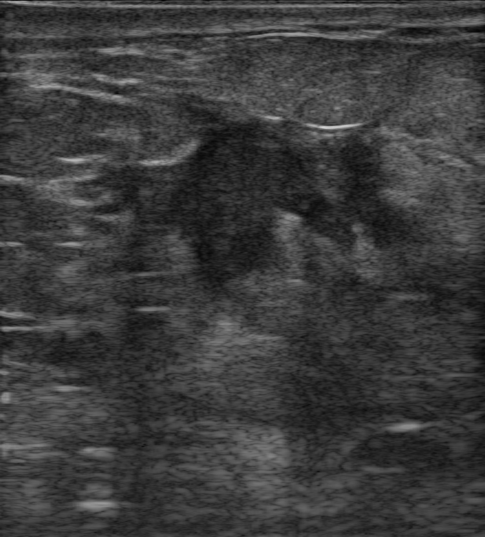

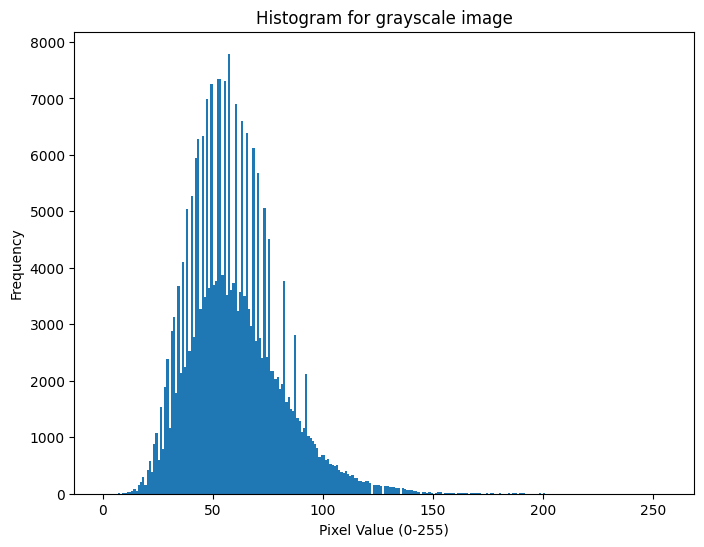

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display  # Import thư viện để hiển thị ảnh trong notebook

def show_histogram_from_file(image_path):
    """
    Đọc ảnh từ tệp, chuyển sang grayscale và hiển thị histogram trong notebook.

    Args:
        image_path (str): Đường dẫn đến tệp ảnh.
    """
    try:
        # Đọc ảnh từ tệp
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if img is None:
            print("Không tìm thấy ảnh tại đường dẫn:", image_path)
            return

        # Chuyển ảnh sang grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Hiển thị ảnh grayscale trong notebook
        print("Ảnh grayscale:")
        _, im_arr = cv2.imencode('.png', gray_img)  # Chuyển ảnh thành dạng byte để hiển thị trong notebook
        display(Image(data=im_arr.tobytes()))

        # Tính histogram
        hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])

        # Vẽ histogram bằng Matplotlib
        plt.figure(figsize=(8, 6))  # Tùy chỉnh kích thước histogram
        plt.hist(gray_img.ravel(), 256, [0, 256])
        plt.title('Histogram for grayscale image')
        plt.xlabel('Pixel Value (0-255)')
        plt.ylabel('Frequency')
        plt.show()

    except Exception as e:
        print(f"Lỗi khi xử lý ảnh: {e}")


# Đường dẫn đến tệp ảnh (thay đổi cho phù hợp với đường dẫn của bạn)
image_path = '/media/mountHDD2/chuyenmt/BrEaST/Eff-UNet_Breast_Tumor_Segmentation/case007.png'

# Gọi hàm để hiển thị histogram
show_histogram_from_file(image_path)


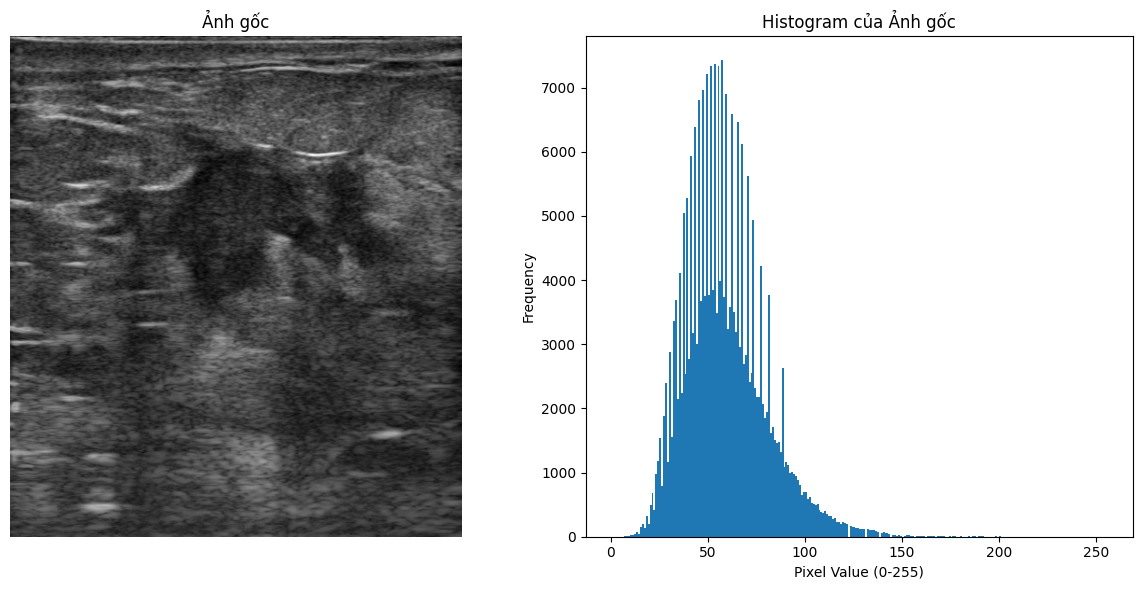

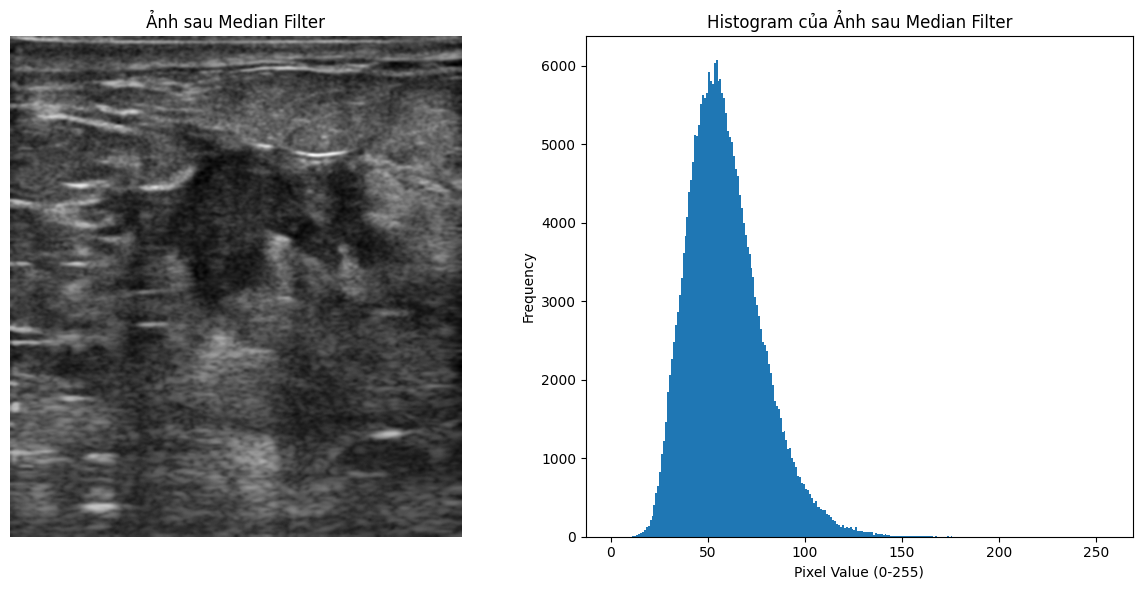

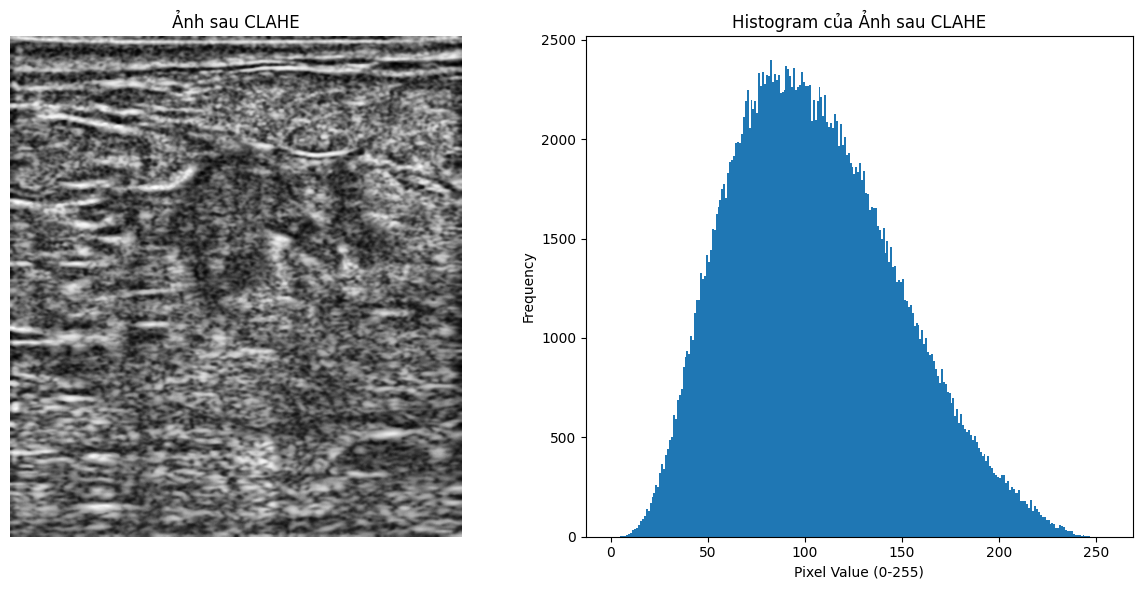

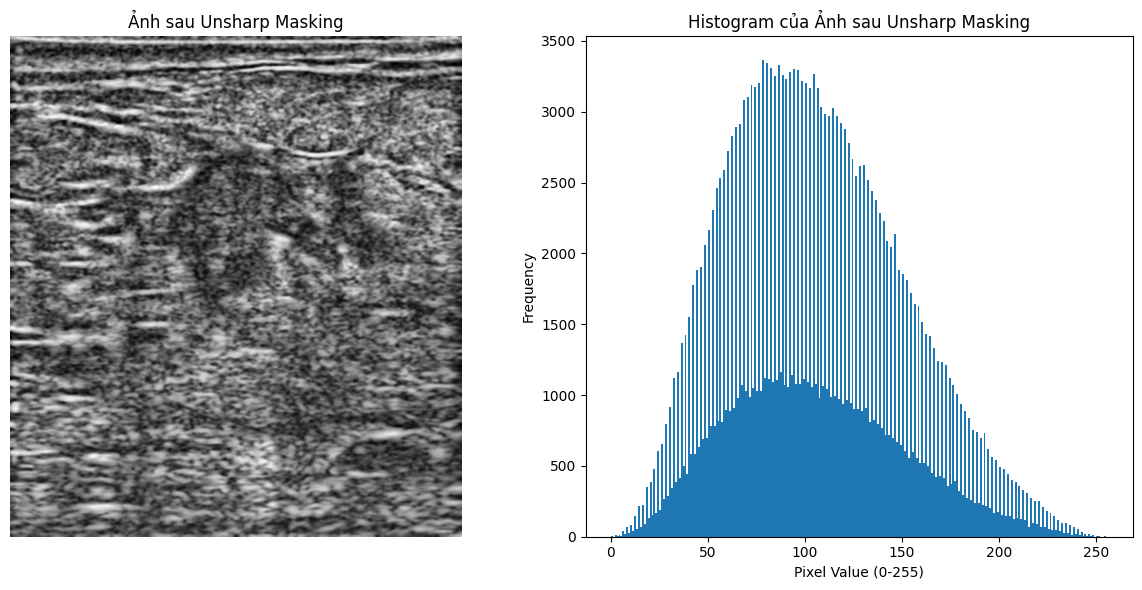

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_and_histogram(image, title):
    """
    Hiển thị ảnh và histogram của ảnh.
    
    Args:
        image (numpy.ndarray): Ảnh cần hiển thị.
        title (str): Tiêu đề của ảnh.
    """
    plt.figure(figsize=(12, 6))

    # Hiển thị ảnh
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Hiển thị histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(f'Histogram của {title}')
    plt.xlabel('Pixel Value (0-255)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


# Đường dẫn ảnh
img_path =path  # Thay bằng đường dẫn ảnh của bạn

# Đọc ảnh grayscale
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

 
# Hiển thị ảnh gốc và histogram
show_image_and_histogram(image, "Ảnh gốc")

# Áp dụng Median Filter
median_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)#cv2.medianBlur(image, 5)
show_image_and_histogram(median_filtered_image, "Ảnh sau Median Filter")

# Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
clahe_image = clahe.apply(median_filtered_image)
show_image_and_histogram(clahe_image, "Ảnh sau CLAHE")

# Áp dụng Unsharp Masking
gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)
unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)
show_image_and_histogram(unsharp_masked_image, "Ảnh sau Unsharp Masking")


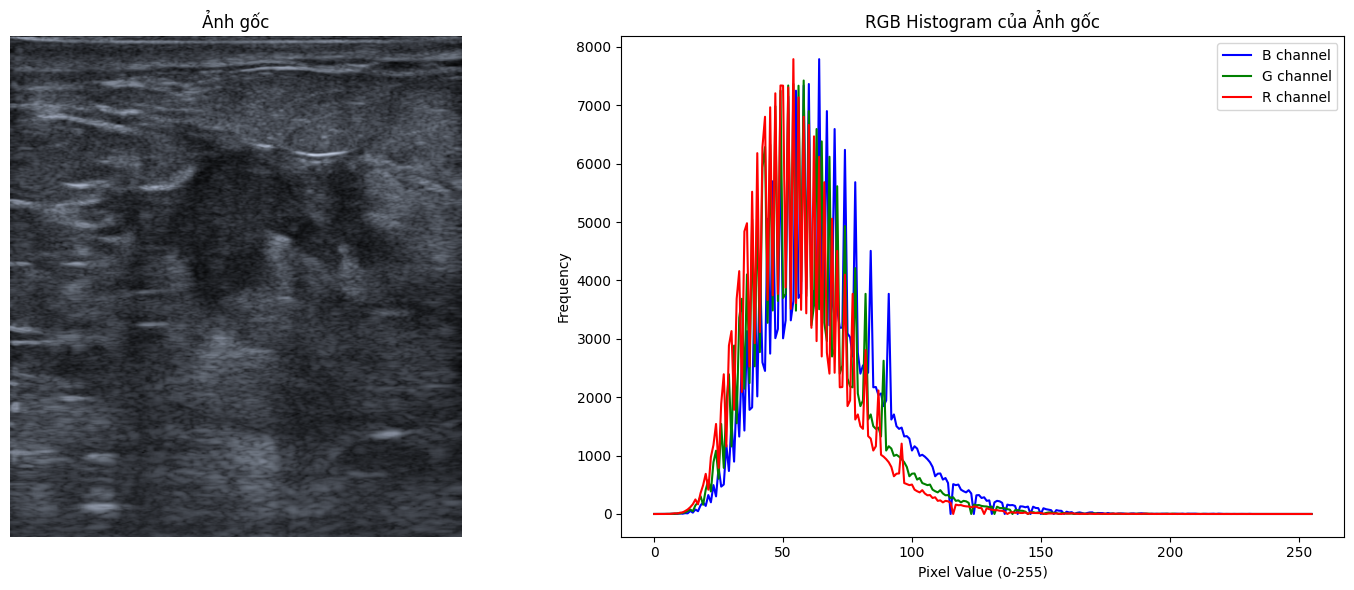

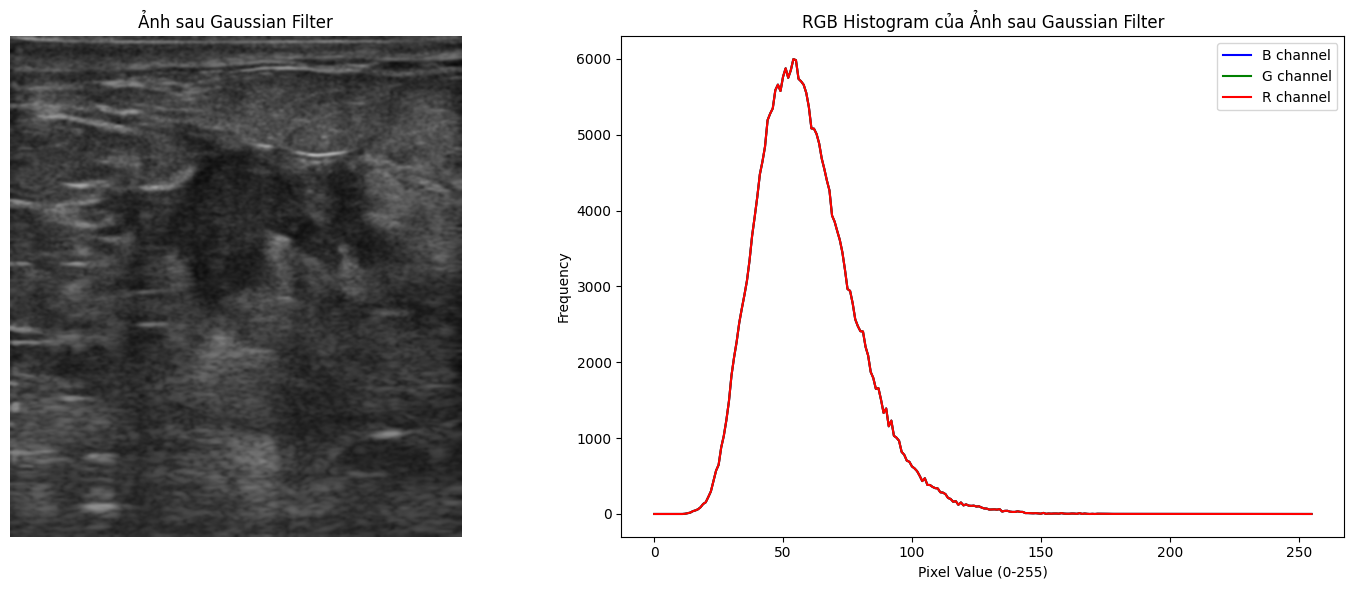

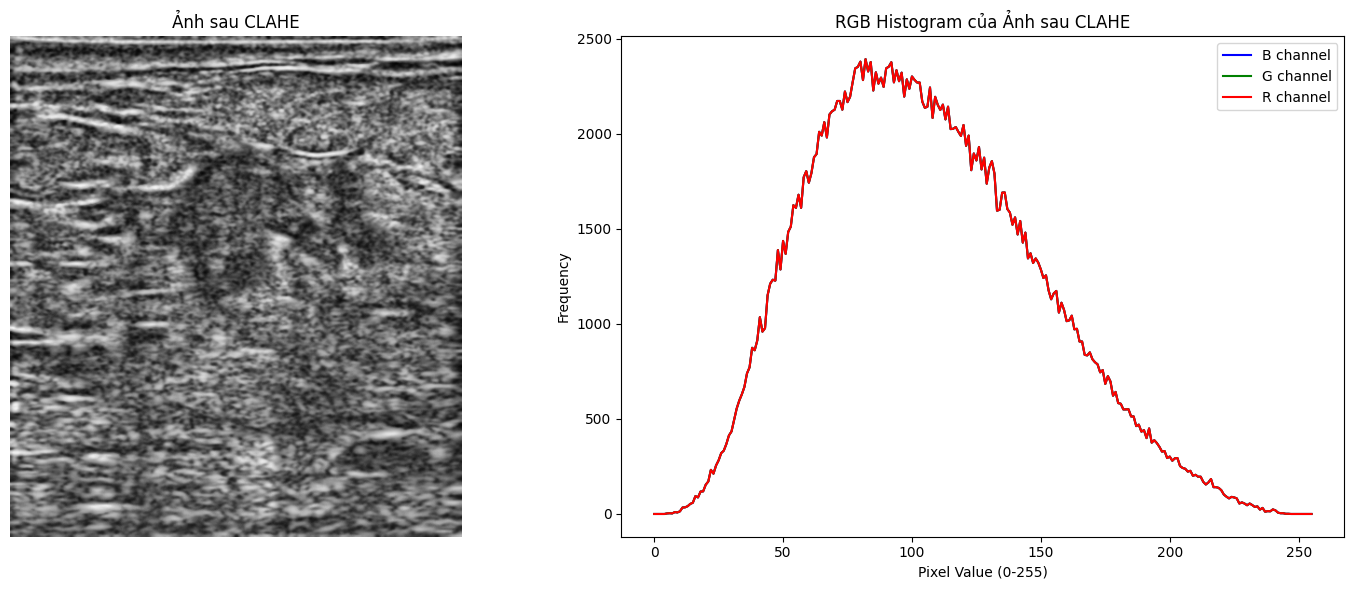

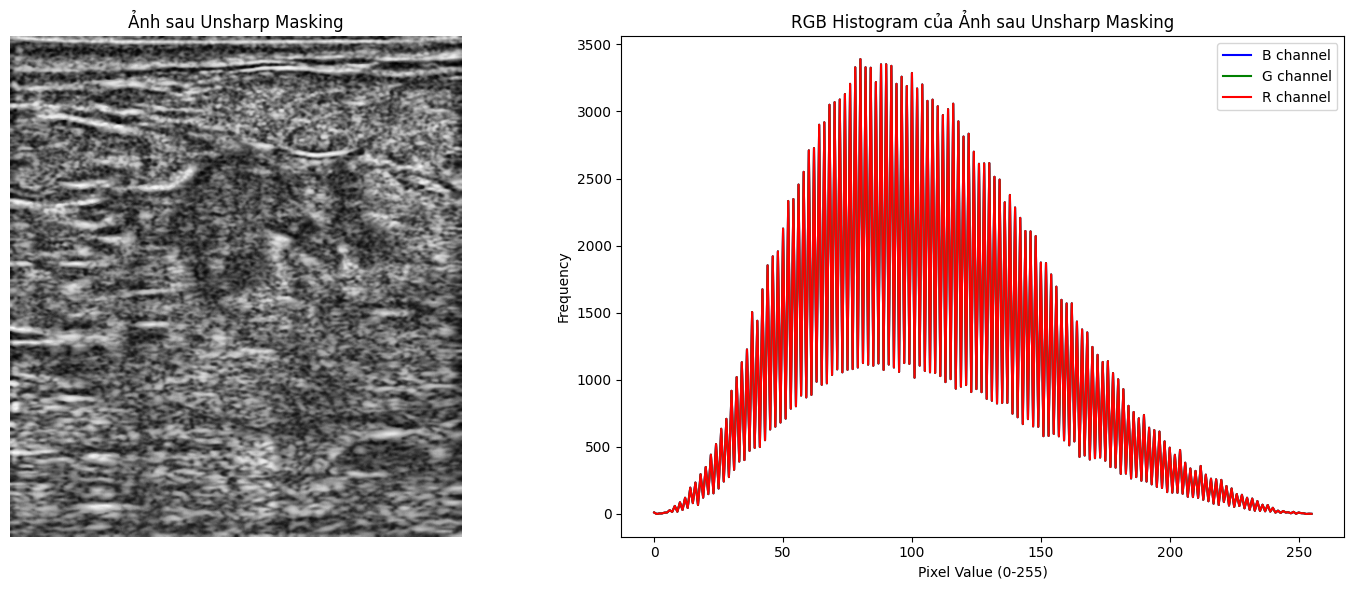

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image_and_rgb_histogram(image, title):
    """
    Hiển thị ảnh và RGB histogram của ảnh.
    
    Args:
        image (numpy.ndarray): Ảnh cần hiển thị.
        title (str): Tiêu đề của ảnh.
    """
    plt.figure(figsize=(15, 6))

    # Hiển thị ảnh
    plt.subplot(1, 2, 1)
    if len(image.shape) == 2:  # Nếu ảnh grayscale
        plt.imshow(image, cmap='gray')
    else:  # Nếu ảnh màu
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

    # Hiển thị RGB histogram
    plt.subplot(1, 2, 2)
    if len(image.shape) == 3:  # Ảnh màu
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color, label=f'{color.upper()} channel')
        plt.title(f'RGB Histogram của {title}')
        plt.xlabel('Pixel Value (0-255)')
        plt.ylabel('Frequency')
        plt.legend()
    else:  # Ảnh grayscale
        plt.hist(image.ravel(), 256, [0, 256], color='gray')
        plt.title(f'Histogram của {title}')
        plt.xlabel('Pixel Value (0-255)')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Đường dẫn ảnh
img_path = path # Thay bằng đường dẫn ảnh của bạn

# Đọc ảnh màu gốc
image_original = cv2.imread(img_path)

# Hiển thị ảnh gốc và RGB histogram
show_image_and_rgb_histogram(image_original, "Ảnh gốc")

# Chuyển sang grayscale để áp dụng các bộ lọc
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian Filter
gaussian_filtered_image = cv2.GaussianBlur(image_gray, (5, 5), 0)
show_image_and_rgb_histogram(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_GRAY2BGR), "Ảnh sau Gaussian Filter")

# Áp dụng CLAHE
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(32, 32))
clahe_image = clahe.apply(gaussian_filtered_image)
show_image_and_rgb_histogram(cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2BGR), "Ảnh sau CLAHE")

# Áp dụng Unsharp Masking
gaussian_blur = cv2.GaussianBlur(clahe_image, (5, 5), 0)
unsharp_masked_image = cv2.addWeighted(clahe_image, 1.5, gaussian_blur, -0.5, 0)
show_image_and_rgb_histogram(cv2.cvtColor(unsharp_masked_image, cv2.COLOR_GRAY2BGR), "Ảnh sau Unsharp Masking")
